In [1]:
#!pip install pyreadr

import pyreadr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
raw_data = pyreadr.read_r('48_-_breast_cancer_data.RData')['out']
# raw_data.to_csv('dataset.csv')

In [3]:
raw_data

,der_ordinal_v1a,der_days_fu,der_deadbinary,der_dead30,der_mv,der_ICU,der_hosp,der_AKI_comp,der_MOF_comp,der_coinfection_any,...,der_txline,der_heme,der_metastatic,der_met_bone,der_met_liver,der_met_lung_v2,der_age_trunc,der_CV_event_v2,der_pulm_event,der_GI_event
0,0,30.0,No,No,No,No,No,No,No,No,...,First line,0,Missing/Unknown,NaN,NaN,NaN,58.0,No,Yes,No
1,0,180.0,No,No,No,No,No,No,No,NaN,...,Non-curative NOS,0,Yes,Yes,No,No,67.0,No,No,No
2,1,10.5,No,No,No,No,Yes,No,No,NaN,...,First line,0,No,No,No,No,42.0,No,No,No
3,1,180.0,No,No,No,No,Yes,No,No,No,...,Untreated in last 12 months,0,Yes,Yes,Yes,No,49.0,No,Yes,No
4,0,180.0,No,No,No,No,No,No,No,No,...,First line,0,No,No,No,No,47.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,0,180.0,No,No,No,No,No,No,No,No,...,First line,0,No,No,No,No,58.0,No,No,No
1379,1,30.0,No,No,No,No,Yes,Yes,No,No,...,Curative NOS,0,Yes,No,No,No,73.0,No,No,No
1380,0,135.0,No,No,No,No,No,No,No,No,...,Untreated in last 12 months,0,No,No,No,No,60.0,No,No,No
1381,1,10.5,No,No,No,No,Yes,No,No,No,...,Untreated in last 12 months,0,No,No,No,No,60.0,No,Yes,No


# Does smoking have an affect on Covid with Breast Cancer on male and female?

Hypothesis: Individuals who smoke and have Breast Cancer have a higher chance of having a severe COVID.

In [4]:
# Creating a data frame for the smoking status
Smoking_df = pd.DataFrame(raw_data["der_smoking2"])
Smoking_df

,der_smoking2
0,Current or Former
1,Never
2,Never
3,Never
4,Never
...,...
1378,Current or Former
1379,Never
1380,Never
1381,Never


In [5]:
# Cleaning the empty cells 
Smoking = Smoking_df.dropna()
Smoking

,der_smoking2
0,Current or Former
1,Never
2,Never
3,Never
4,Never
...,...
1378,Current or Former
1379,Never
1380,Never
1381,Never


## Overall Smoking Status

In [6]:
# Creating an empty list to hold the number of each smoking status
Status_Count = []

# Number of individuals who never smoked
NonSmokers_Count = Smoking.value_counts()["Never"]
print(f"{NonSmokers_Count} individuas has never smoked in their life")
Status_Count.append(NonSmokers_Count)

# Number of individuals who are a current smoker or used to smoke.
Smokers_Count = Smoking.value_counts()["Current or Former"]
print(f"{Smokers_Count} individuas are a current smoker or used to smoke")
Status_Count.append(Smokers_Count)

# Number of unknown smoking status.
try:
    Unknown_Count = Smoking.value_counts()["Unknown"]
    print(f"{Unknown_Count} individuas have an unknown smoking status")
    Status_Count.append(Unknown_Count)
except:
    print("No unknown smoking status was found")

print(Status_Count)

911 individuas has never smoked in their life
442 individuas are a current smoker or used to smoke
No unknown smoking status was found
[911, 442]


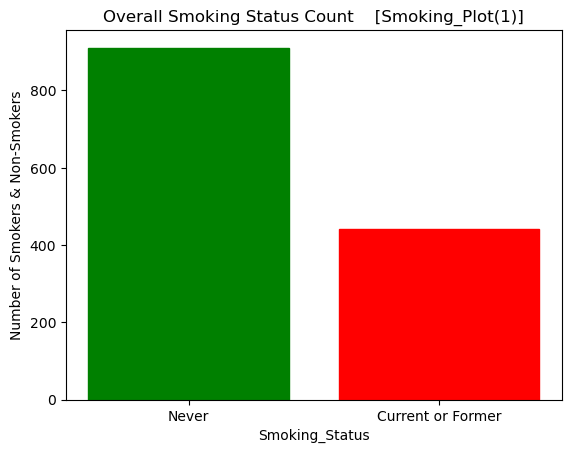

<Figure size 640x480 with 0 Axes>

In [7]:
# Creating a plot to compare the amount of smokers vs. non-smokers
Smoking_Status = ["Never","Current or Former"]
x_axis = np.arange(len(Status_Count))
Overall_Smoking = plt.bar(x_axis, Status_Count, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Smoking_Status)
plt.title("Overall Smoking Status Count    [Smoking_Plot(1)]")
plt.xlabel("Smoking_Status")
plt.ylabel("Number of Smokers & Non-Smokers")
Overall_Smoking[0].set_color('green')
Overall_Smoking[1].set_color('red')
plt.show()
# Save the figure
plt.savefig("Smoking_Output_Data/Smoking_Plot(1).png")

## Breast Cancer Status at Time of COVID Diagnosis VS. Smoking Status

In [8]:
# Creating a data frame for the cancer status and the smoking status
Cancer_Smoking_df = pd.DataFrame(raw_data[["der_smoking2", "der_cancer_status_v4"]])
Cancer_Smoking_df

,der_smoking2,der_cancer_status_v4
0,Current or Former,Active and responding
1,Never,Active and stable
2,Never,NaN
3,Never,Unknown
4,Never,Active and responding
...,...,...
1378,Current or Former,Active and responding
1379,Never,Active and responding
1380,Never,"Remission or no evidence of disease, >5 years"
1381,Never,Unknown


In [9]:
# Cleaning the empty cells 
Cancer_Smoking = Cancer_Smoking_df.dropna()
Cancer_Smoking.sample(20)

,der_smoking2,der_cancer_status_v4
1289,Current or Former,"Remission or no evidence of disease, >5 years"
947,Never,"Remission or no evidence of disease, >5 years"
117,Never,Active and stable
544,Never,"Remission or no evidence of disease, >5 years"
1270,Current or Former,Unknown
621,Never,"Remission or no evidence of disease, >5 years"
200,Never,Active and stable
484,Never,"Remission or no evidence of disease, <5 years"
219,Never,"Remission or no evidence of disease, >5 years"
809,Never,Active and responding


In [10]:
# Creating an empty list to hold the values for smoker individuals with different breast cancer status
Smoker_BC_Count = []

In [11]:
# Individuals who are smokers and their cancer status is Active and responding
NonSmoker_A_Responding = Cancer_Smoking_df.loc[(Cancer_Smoking_df["der_smoking2"] == "Current or Former") & (Cancer_Smoking_df["der_cancer_status_v4"] == "Active and responding")]
NonSmoker_A_Responding_Count = len(NonSmoker_A_Responding)
Smoker_BC_Count.append(NonSmoker_A_Responding_Count)
print(Smoker_BC_Count)

[54]


In [12]:
# Individuals who are smokers and their cancer status is Active and stable
NonSmoker_A_Stable = Cancer_Smoking_df.loc[(Cancer_Smoking_df["der_smoking2"] == "Current or Former") & (Cancer_Smoking_df["der_cancer_status_v4"] == "Active and stable")]
NonSmoker_A_Stable_Count = len(NonSmoker_A_Stable)
Smoker_BC_Count.append(NonSmoker_A_Stable_Count)
print(Smoker_BC_Count)

[54, 53]


In [13]:
# Individuals who are smokers and their cancer status is Active and progressing
NonSmoker_A_Progressing = Cancer_Smoking_df.loc[(Cancer_Smoking_df["der_smoking2"] == "Current or Former") & (Cancer_Smoking_df["der_cancer_status_v4"] == "Active and progressing")]
NonSmoker_A_Progressing = len(NonSmoker_A_Progressing)
Smoker_BC_Count.append(NonSmoker_A_Progressing)
print(Smoker_BC_Count)

[54, 53, 33]


In [14]:
# Creating an empty list to hold the values for non-smoker individuals with different breast cancer status
NonSmoker_BC_Count = []

In [15]:
# Individuals who are non-smokers and their cancer status is Active and responding
NonSmoker_A_Responding = Cancer_Smoking_df.loc[(Cancer_Smoking_df["der_smoking2"] == "Never") & (Cancer_Smoking_df["der_cancer_status_v4"] == "Active and responding")]
NonSmoker_A_Responding_Count = len(NonSmoker_A_Responding)
NonSmoker_BC_Count.append(NonSmoker_A_Responding_Count)
print(NonSmoker_BC_Count)

[115]


In [16]:
# Individuals who are non-smokers and their cancer status is Active and stable
NonSmoker_A_Stable = Cancer_Smoking_df.loc[(Cancer_Smoking_df["der_smoking2"] == "Never") & (Cancer_Smoking_df["der_cancer_status_v4"] == "Active and stable")]
NonSmoker_A_Stable_Count = len(NonSmoker_A_Stable)
NonSmoker_BC_Count.append(NonSmoker_A_Stable_Count)
print(NonSmoker_BC_Count)

[115, 110]


In [17]:
# Individuals who are non-smokers and their cancer status is Active and progressing
NonSmoker_A_Progressing = Cancer_Smoking_df.loc[(Cancer_Smoking_df["der_smoking2"] == "Never") & (Cancer_Smoking_df["der_cancer_status_v4"] == "Active and progressing")]
NonSmoker_A_Progressing = len(NonSmoker_A_Progressing)
NonSmoker_BC_Count.append(NonSmoker_A_Progressing)
print(NonSmoker_BC_Count)

[115, 110, 64]


In [23]:
# Creating a data frame which includes both the Smoker_BC_Count & NonSmoker_BC_Count for comparison as well as plotting.
BC_Status = ["Active and responding", "Active and stable" , "Active and progressing"]
Smoker_NonSmoker_BC_DF = pd.DataFrame (
    {
        "Smoker_BC_Count" : Smoker_BC_Count,
        "NonSmoker_BC_Count" : NonSmoker_BC_Count},
        index = BC_Status
    
)

Smoker_NonSmoker_BC_DF

,Smoker_BC_Count,NonSmoker_BC_Count
Active and responding,54,115
Active and stable,53,110
Active and progressing,33,64


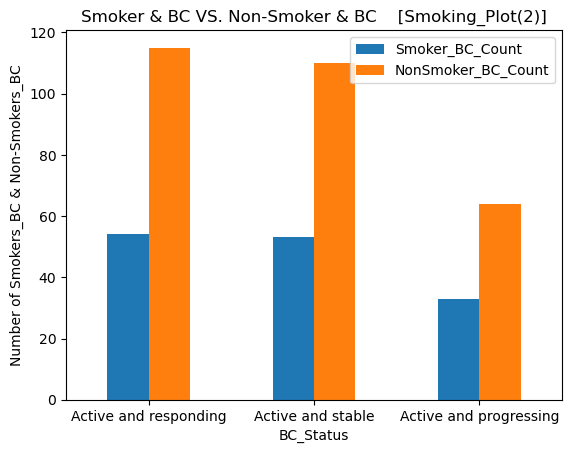

In [27]:
# Plotting
Smoker_NonSmoker_BC_plot = Smoker_NonSmoker_BC_DF.plot.bar(rot=0)
plt.title("Smoker & BC VS. Non-Smoker & BC    [Smoking_Plot(2)]")
plt.xlabel("BC_Status")
plt.ylabel("Number of Smokers_BC & Non-Smokers_BC")
# Save the figure
plt.savefig("Smoking_Output_Data/Smoking_Plot(2).png")

## Severity of COVID VS. Smoking Status

In [28]:
# Creating a data frame for the Severity of COVID and the smoking status
Covid_Smoking_df = pd.DataFrame(raw_data[["der_smoking2", "severity_of_covid_19_v2"]])
Covid_Smoking_df

,der_smoking2,severity_of_covid_19_v2
0,Current or Former,Severe
1,Never,Mild
2,Never,Moderate
3,Never,Moderate
4,Never,Mild
...,...,...
1378,Current or Former,Mild
1379,Never,Moderate
1380,Never,Mild
1381,Never,Moderate


In [40]:
# Cleaning the empty cells 
Covid_Smoking_df = Covid_Smoking_df.dropna()
Covid_Smoking_df.sample(20)

,der_smoking2,severity_of_covid_19_v2
415,Current or Former,Mild
641,Never,Mild
152,Never,Mild
1296,Current or Former,Mild
660,Never,Mild
799,Never,Mild
361,Never,Mild
513,Current or Former,Moderate
1370,Never,Mild
346,Never,Mild


In [39]:
# Creating an empty list to hold the values for smoker individuals with different severity of COVID
Smoker_Covid_Count = []

In [41]:
# Individuals who are smokers and their covid status is Mild
Smoker_Mild = Covid_Smoking_df.loc[(Covid_Smoking_df["der_smoking2"] == "Current or Former") & (Covid_Smoking_df["severity_of_covid_19_v2"] == "Mild")]
Smoker_Mild_Count = len(Smoker_Mild)
Smoker_Covid_Count.append(Smoker_Mild_Count)
print(Smoker_Covid_Count)

[281]


In [42]:
# Individuals who are smokers and their covid status is Moderate
Smoker_Moderate = Covid_Smoking_df.loc[(Covid_Smoking_df["der_smoking2"] == "Current or Former") & (Covid_Smoking_df["severity_of_covid_19_v2"] == "Moderate")]
Smoker_Moderate_Count = len(Smoker_Moderate)
Smoker_Covid_Count.append(Smoker_Moderate_Count)
print(Smoker_Covid_Count)

[281, 139]


In [43]:
# Individuals who are smokers and their covid status is Severe
Smoker_Severe = Covid_Smoking_df.loc[(Covid_Smoking_df["der_smoking2"] == "Current or Former") & (Covid_Smoking_df["severity_of_covid_19_v2"] == "Severe")]
Smoker_Severe_Count = len(Smoker_Severe)
Smoker_Covid_Count.append(Smoker_Severe_Count)
print(Smoker_Covid_Count)

[281, 139, 21]


In [45]:
# Creating an empty list to hold the values for non-smoker individuals with different severity of COVID
NonSmoker_Covid_Count = []

In [46]:
# Individuals who are smokers and their covid status is Mild
NonSmoker_Mild = Covid_Smoking_df.loc[(Covid_Smoking_df["der_smoking2"] == "Never") & (Covid_Smoking_df["severity_of_covid_19_v2"] == "Mild")]
NonSmoker_Mild_Count = len(NonSmoker_Mild)
NonSmoker_Covid_Count.append(NonSmoker_Mild_Count)
print(NonSmoker_Covid_Count)

[665]


In [48]:
# Individuals who are smokers and their covid status is Moderate
NonSmoker_Moderate = Covid_Smoking_df.loc[(Covid_Smoking_df["der_smoking2"] == "Never") & (Covid_Smoking_df["severity_of_covid_19_v2"] == "Moderate")]
NonSmoker_Moderate_Count = len(NonSmoker_Moderate)
NonSmoker_Covid_Count.append(NonSmoker_Moderate_Count)
print(NonSmoker_Covid_Count)

[665, 214]


In [49]:
# Individuals who are smokers and their covid status is Severe
NonSmoker_Severe = Covid_Smoking_df.loc[(Covid_Smoking_df["der_smoking2"] == "Never") & (Covid_Smoking_df["severity_of_covid_19_v2"] == "Severe")]
NonSmoker_Severe_Count = len(NonSmoker_Severe)
NonSmoker_Covid_Count.append(NonSmoker_Severe_Count)
print(NonSmoker_Covid_Count)

[665, 214, 31]


In [106]:
# Creating a data frame which includes both the Smoker_Covid_Count & NonSmoker_Covid_Count for comparison as well as plotting.
Covid_Status = ["Mild", "Moderate" , "Severe"]
Smoker_NonSmoker_Covid_DF = pd.DataFrame (
    {
        "Smoker_Covid_Count" : Smoker_Covid_Count,
        "NonSmoker_Covid_Count" : NonSmoker_Covid_Count},
        index = Covid_Status
    
)

Smoker_NonSmoker_Covid_DF

,Smoker_Covid_Count,NonSmoker_Covid_Count
Mild,281,665
Moderate,139,214
Severe,21,31


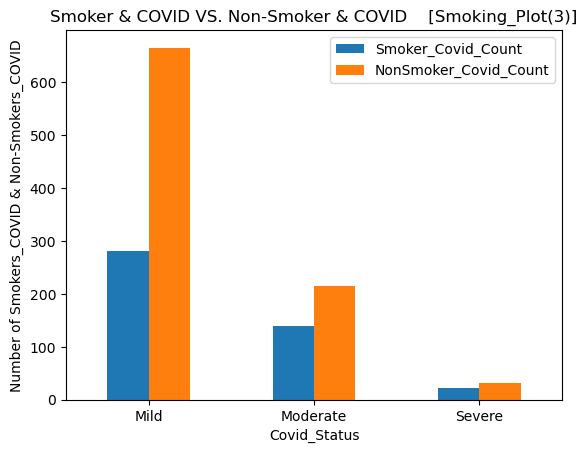

In [107]:
# Plotting
Smoker_NonSmoker_Covid_plot = Smoker_NonSmoker_Covid_DF.plot.bar(rot=0)
plt.title("Smoker & COVID VS. Non-Smoker & COVID    [Smoking_Plot(3)]")
plt.xlabel("Covid_Status")
plt.ylabel("Number of Smokers_COVID & Non-Smokers_COVID")
# Save the figure
plt.savefig("Smoking_Output_Data/Smoking_Plot(3).png")

## Breast Cancer Status & Severity of COVID VS. Smoking Status

In [55]:
# Creating a data frame for the cancer status, Severity of COVID, and the smoking status
Cancer_Covid_Smoking_df = pd.DataFrame(raw_data[["der_smoking2", "der_cancer_status_v4", "severity_of_covid_19_v2"]])
Cancer_Covid_Smoking_df

,der_smoking2,der_cancer_status_v4,severity_of_covid_19_v2
0,Current or Former,Active and responding,Severe
1,Never,Active and stable,Mild
2,Never,NaN,Moderate
3,Never,Unknown,Moderate
4,Never,Active and responding,Mild
...,...,...,...
1378,Current or Former,Active and responding,Mild
1379,Never,Active and responding,Moderate
1380,Never,"Remission or no evidence of disease, >5 years",Mild
1381,Never,Unknown,Moderate


In [58]:
# Cleaning the empty cells 
Cancer_Covid_Smoking_df = Cancer_Covid_Smoking_df.dropna()
Cancer_Covid_Smoking_df.sample(20)

,der_smoking2,der_cancer_status_v4,severity_of_covid_19_v2
1232,Never,Active and responding,Moderate
178,Current or Former,"Remission or no evidence of disease, >5 years",Mild
1218,Never,"Remission or no evidence of disease, >5 years",Mild
1108,Never,Unknown,Mild
972,Never,Unknown,Moderate
102,Current or Former,"Remission or no evidence of disease, >5 years",Mild
781,Never,"Remission or no evidence of disease, <5 years",Moderate
1160,Never,"Remission or no evidence of disease, >5 years",Mild
908,Never,Active and progressing,Moderate
858,Never,"Remission or no evidence of disease, <5 years",Severe


In [86]:
# Creating an empty list to hold the values for smoker individuals with different breast cancer status & different severity of COVID
Smoker_BC_Covid_Count = []

In [87]:
# Individuals who are smokers and their covid status is Mild and their cancer status is Active and responding
try: 
    Smoker_Mild_A_Responding = Cancer_Covid_Smoking_df.loc[(Cancer_Covid_Smoking_df["der_smoking2"] == "Current or Former") & (Cancer_Covid_Smoking_df["severity_of_covid_19_v2"] == "Mild") & (Cancer_Covid_Smoking_df["der_cancer_status_v4"] == "Active and responding")]
    Smoker_Mild_A_Responding_Count = len(Smoker_Mild_A_Responding)
    Smoker_BC_Covid_Count.append(Smoker_Mild_A_Responding_Count)
    print(Smoker_BC_Covid_Count)
except:
    print("No Result was found")

[35]


In [88]:
# Individuals who are smokers and their covid status is Mild and their cancer status is Active and stable
try: 
    Smoker_Mild_A_stable = Cancer_Covid_Smoking_df.loc[(Cancer_Covid_Smoking_df["der_smoking2"] == "Current or Former") & (Cancer_Covid_Smoking_df["severity_of_covid_19_v2"] == "Mild") & (Cancer_Covid_Smoking_df["der_cancer_status_v4"] == "Active and stable")]
    Smoker_Mild_A_stable_Count = len(Smoker_Mild_A_stable)
    Smoker_BC_Covid_Count.append(Smoker_Mild_A_stable_Count)
    print(Smoker_BC_Covid_Count)
except:
    print("No Result was found")

[35, 37]


In [89]:
# Individuals who are smokers and their covid status is Mild and their cancer status is Active and progressing
try: 
    Smoker_Mild_A_progressing = Cancer_Covid_Smoking_df.loc[(Cancer_Covid_Smoking_df["der_smoking2"] == "Current or Former") & (Cancer_Covid_Smoking_df["severity_of_covid_19_v2"] == "Mild") & (Cancer_Covid_Smoking_df["der_cancer_status_v4"] == "Active and progressing")]
    Smoker_Mild_A_progressing_Count = len(Smoker_Mild_A_progressing)
    Smoker_BC_Covid_Count.append(Smoker_Mild_A_progressing_Count)
    print(Smoker_BC_Covid_Count)
except:
    print("No Result was found")

[35, 37, 12]


In [90]:
# Individuals who are smokers and their covid status is Moderate and their cancer status is Active and responding
try: 
    Smoker_Moderate_A_Responding = Cancer_Covid_Smoking_df.loc[(Cancer_Covid_Smoking_df["der_smoking2"] == "Current or Former") & (Cancer_Covid_Smoking_df["severity_of_covid_19_v2"] == "Moderate") & (Cancer_Covid_Smoking_df["der_cancer_status_v4"] == "Active and responding")]
    Smoker_Moderate_A_Responding_Count = len(Smoker_Moderate_A_Responding)
    Smoker_BC_Covid_Count.append(Smoker_Moderate_A_Responding_Count)
    print(Smoker_BC_Covid_Count)
except:
    print("No Result was found")

[35, 37, 12, 17]


In [91]:
# Individuals who are smokers and their covid status is Moderate and their cancer status is Active and stable
try: 
    Smoker_Moderate_A_stable = Cancer_Covid_Smoking_df.loc[(Cancer_Covid_Smoking_df["der_smoking2"] == "Current or Former") & (Cancer_Covid_Smoking_df["severity_of_covid_19_v2"] == "Moderate") & (Cancer_Covid_Smoking_df["der_cancer_status_v4"] == "Active and stable")]
    Smoker_Moderate_A_stable_Count = len(Smoker_Moderate_A_stable)
    Smoker_BC_Covid_Count.append(Smoker_Moderate_A_stable_Count)
    print(Smoker_BC_Covid_Count)
except:
    print("No Result was found")

[35, 37, 12, 17, 15]


In [92]:
# Individuals who are smokers and their covid status is Moderate and their cancer status is Active and progressing
try: 
    Smoker_Moderate_A_progressing = Cancer_Covid_Smoking_df.loc[(Cancer_Covid_Smoking_df["der_smoking2"] == "Current or Former") & (Cancer_Covid_Smoking_df["severity_of_covid_19_v2"] == "Moderate") & (Cancer_Covid_Smoking_df["der_cancer_status_v4"] == "Active and progressing")]
    Smoker_Moderate_A_progressing_Count = len(Smoker_Moderate_A_progressing)
    Smoker_BC_Covid_Count.append(Smoker_Moderate_A_progressing_Count)
    print(Smoker_BC_Covid_Count)
except:
    print("No Result was found")

[35, 37, 12, 17, 15, 16]


In [93]:
# Individuals who are smokers and their covid status is Severe and their cancer status is Active and responding
try: 
    Smoker_Severe_A_Responding = Cancer_Covid_Smoking_df.loc[(Cancer_Covid_Smoking_df["der_smoking2"] == "Current or Former") & (Cancer_Covid_Smoking_df["severity_of_covid_19_v2"] == "Severe") & (Cancer_Covid_Smoking_df["der_cancer_status_v4"] == "Active and responding")]
    Smoker_Severe_A_Responding_Count = len(Smoker_Severe_A_Responding)
    Smoker_BC_Covid_Count.append(Smoker_Severe_A_Responding_Count)
    print(Smoker_BC_Covid_Count)
except:
    print("No Result was found")

[35, 37, 12, 17, 15, 16, 2]


In [94]:
# Individuals who are smokers and their covid status is Severe and their cancer status is Active and stable
try: 
    Smoker_Severe_A_stable = Cancer_Covid_Smoking_df.loc[(Cancer_Covid_Smoking_df["der_smoking2"] == "Current or Former") & (Cancer_Covid_Smoking_df["severity_of_covid_19_v2"] == "Severe") & (Cancer_Covid_Smoking_df["der_cancer_status_v4"] == "Active and stable")]
    Smoker_Severe_A_stable_Count = len(Smoker_Severe_A_stable)
    Smoker_BC_Covid_Count.append(Smoker_Severe_A_stable_Count)
    print(Smoker_BC_Covid_Count)
except:
    print("No Result was found")

[35, 37, 12, 17, 15, 16, 2, 0]


In [95]:
# Individuals who are smokers and their covid status is Severe and their cancer status is Active and progressing
try: 
    Smoker_Severe_A_progressing = Cancer_Covid_Smoking_df.loc[(Cancer_Covid_Smoking_df["der_smoking2"] == "Current or Former") & (Cancer_Covid_Smoking_df["severity_of_covid_19_v2"] == "Severe") & (Cancer_Covid_Smoking_df["der_cancer_status_v4"] == "Active and progressing")]
    Smoker_Severe_A_progressing_Count = len(Smoker_Severe_A_progressing)
    Smoker_BC_Covid_Count.append(Smoker_Severe_A_progressing_Count)
    print(Smoker_BC_Covid_Count)
except:
    print("No Result was found")

[35, 37, 12, 17, 15, 16, 2, 0, 5]


In [96]:
# Creating an empty list to hold the values for non-smoker individuals with different breast cancer status & different severity of COVID
NonSmoker_BC_Covid_Count = []

In [97]:
# Individuals who are non-smokers and their covid status is Mild and their cancer status is Active and responding
try: 
    NonSmoker_Mild_A_Responding = Cancer_Covid_Smoking_df.loc[(Cancer_Covid_Smoking_df["der_smoking2"] == "Never") & (Cancer_Covid_Smoking_df["severity_of_covid_19_v2"] == "Mild") & (Cancer_Covid_Smoking_df["der_cancer_status_v4"] == "Active and responding")]
    NonSmoker_Mild_A_Responding_Count = len(NonSmoker_Mild_A_Responding)
    NonSmoker_BC_Covid_Count.append(NonSmoker_Mild_A_Responding_Count)
    print(NonSmoker_BC_Covid_Count)
except:
    print("No Result was found")

[86]


In [98]:
# Individuals who are non-smokers and their covid status is Mild and their cancer status is Active and stable
try: 
    NonSmoker_Mild_A_stable = Cancer_Covid_Smoking_df.loc[(Cancer_Covid_Smoking_df["der_smoking2"] == "Never") & (Cancer_Covid_Smoking_df["severity_of_covid_19_v2"] == "Mild") & (Cancer_Covid_Smoking_df["der_cancer_status_v4"] == "Active and stable")]
    NonSmoker_Mild_A_stable_Count = len(NonSmoker_Mild_A_stable)
    NonSmoker_BC_Covid_Count.append(NonSmoker_Mild_A_stable_Count)
    print(NonSmoker_BC_Covid_Count)
except:
    print("No Result was found")

[86, 82]


In [99]:
# Individuals who are non-smokers and their covid status is Mild and their cancer status is Active and progressing
try: 
    NonSmoker_Mild_A_progressing = Cancer_Covid_Smoking_df.loc[(Cancer_Covid_Smoking_df["der_smoking2"] == "Never") & (Cancer_Covid_Smoking_df["severity_of_covid_19_v2"] == "Mild") & (Cancer_Covid_Smoking_df["der_cancer_status_v4"] == "Active and progressing")]
    NonSmoker_Mild_A_progressing_Count = len(NonSmoker_Mild_A_progressing)
    NonSmoker_BC_Covid_Count.append(NonSmoker_Mild_A_progressing_Count)
    print(NonSmoker_BC_Covid_Count)
except:
    print("No Result was found")

[86, 82, 26]


In [100]:
# Individuals who are non-smokers and their covid status is Moderate and their cancer status is Active and responding
try: 
    NonSmoker_Moderate_A_Responding = Cancer_Covid_Smoking_df.loc[(Cancer_Covid_Smoking_df["der_smoking2"] == "Never") & (Cancer_Covid_Smoking_df["severity_of_covid_19_v2"] == "Moderate") & (Cancer_Covid_Smoking_df["der_cancer_status_v4"] == "Active and responding")]
    NonSmoker_Moderate_A_Responding_Count = len(NonSmoker_Moderate_A_Responding)
    NonSmoker_BC_Covid_Count.append(NonSmoker_Moderate_A_Responding_Count)
    print(NonSmoker_BC_Covid_Count)
except:
    print("No Result was found")

[86, 82, 26, 26]


In [101]:
# Individuals who are non-smokers and their covid status is Moderate and their cancer status is Active and stable
try: 
    NonSmoker_Moderate_A_stable = Cancer_Covid_Smoking_df.loc[(Cancer_Covid_Smoking_df["der_smoking2"] == "Never") & (Cancer_Covid_Smoking_df["severity_of_covid_19_v2"] == "Moderate") & (Cancer_Covid_Smoking_df["der_cancer_status_v4"] == "Active and stable")]
    NonSmoker_Moderate_A_stable_Count = len(NonSmoker_Moderate_A_stable)
    NonSmoker_BC_Covid_Count.append(NonSmoker_Moderate_A_stable_Count)
    print(NonSmoker_BC_Covid_Count)
except:
    print("No Result was found")

[86, 82, 26, 26, 25]


In [102]:
# Individuals who are non-smokers and their covid status is Moderate and their cancer status is Active and progressing
try: 
    NonSmoker_Moderate_A_progressing = Cancer_Covid_Smoking_df.loc[(Cancer_Covid_Smoking_df["der_smoking2"] == "Never") & (Cancer_Covid_Smoking_df["severity_of_covid_19_v2"] == "Moderate") & (Cancer_Covid_Smoking_df["der_cancer_status_v4"] == "Active and progressing")]
    NonSmoker_Moderate_A_progressing_Count = len(NonSmoker_Moderate_A_progressing)
    NonSmoker_BC_Covid_Count.append(NonSmoker_Moderate_A_progressing_Count)
    print(NonSmoker_BC_Covid_Count)
except:
    print("No Result was found")

[86, 82, 26, 26, 25, 33]


In [103]:
# Individuals who are non-smokers and their covid status is Severe and their cancer status is Active and responding
try: 
    NonSmoker_Severe_A_Responding = Cancer_Covid_Smoking_df.loc[(Cancer_Covid_Smoking_df["der_smoking2"] == "Never") & (Cancer_Covid_Smoking_df["severity_of_covid_19_v2"] == "Severe") & (Cancer_Covid_Smoking_df["der_cancer_status_v4"] == "Active and responding")]
    NonSmoker_Severe_A_Responding_Count = len(NonSmoker_Severe_A_Responding)
    NonSmoker_BC_Covid_Count.append(NonSmoker_Severe_A_Responding_Count)
    print(NonSmoker_BC_Covid_Count)
except:
    print("No Result was found")

[86, 82, 26, 26, 25, 33, 3]


In [104]:
# Individuals who are non-smokers and their covid status is Severe and their cancer status is Active and stable
try: 
    NonSmoker_Severe_A_stable = Cancer_Covid_Smoking_df.loc[(Cancer_Covid_Smoking_df["der_smoking2"] == "Never") & (Cancer_Covid_Smoking_df["severity_of_covid_19_v2"] == "Severe") & (Cancer_Covid_Smoking_df["der_cancer_status_v4"] == "Active and stable")]
    NonSmoker_Severe_A_stable_Count = len(NonSmoker_Severe_A_stable)
    NonSmoker_BC_Covid_Count.append(NonSmoker_Severe_A_stable_Count)
    print(NonSmoker_BC_Covid_Count)
except:
    print("No Result was found")

[86, 82, 26, 26, 25, 33, 3, 3]


In [105]:
# Individuals who are non-smokers and their covid status is Severe and their cancer status is Active and progressing
try: 
    NonSmoker_Severe_A_progressing = Cancer_Covid_Smoking_df.loc[(Cancer_Covid_Smoking_df["der_smoking2"] == "Never") & (Cancer_Covid_Smoking_df["severity_of_covid_19_v2"] == "Severe") & (Cancer_Covid_Smoking_df["der_cancer_status_v4"] == "Active and progressing")]
    NonSmoker_Severe_A_progressing_Count = len(NonSmoker_Severe_A_progressing)
    NonSmoker_BC_Covid_Count.append(NonSmoker_Severe_A_progressing_Count)
    print(NonSmoker_BC_Covid_Count)
except:
    print("No Result was found")

[86, 82, 26, 26, 25, 33, 3, 3, 5]


In [108]:
# Creating a data frame which includes both the Smoker_BC_Covid_Count & NonSmoker_BC_Covid_Count for comparison as well as plotting.
COV_BC_Status = ["Mild COVID & Active and responding", "Mild COVID &  Active and stable" , "Mild COVID & Active and progressing",
                "Moderate COVID & Active and responding", "Moderate COVID &  Active and stable" , "Moderate COVID & Active and progressing",
                "Severe COVID & Active and responding", "Severe COVID &  Active and stable" , "Severe COVID & Active and progressing"]

COV_BC_Smoker_NonSmoker_DF = pd.DataFrame (
    {
        "Smoker_BC_Covid_Count" : Smoker_BC_Covid_Count,
        "NonSmoker_BC_Covid_Count" : NonSmoker_BC_Covid_Count},
        index = COV_BC_Status
    
)

COV_BC_Smoker_NonSmoker_DF

,Smoker_BC_Covid_Count,NonSmoker_BC_Covid_Count
Mild COVID & Active and responding,35,86
Mild COVID & Active and stable,37,82
Mild COVID & Active and progressing,12,26
Moderate COVID & Active and responding,17,26
Moderate COVID & Active and stable,15,25
Moderate COVID & Active and progressing,16,33
Severe COVID & Active and responding,2,3
Severe COVID & Active and stable,0,3
Severe COVID & Active and progressing,5,5


In [130]:
# mild covid
MildCov_BC_Status = ["Mild COVID & Active and responding", "Mild COVID &  Active and stable" , "Mild COVID & Active and progressing"]

Smoker_BC_MildCov_Count = []
for i in [0,1,2]:
    Smoker_BC_MildCov_Count.append(Smoker_BC_Covid_Count[i])
NonSmoker_BC_MildCov_Count = []
for i in [0,1,2]:
    NonSmoker_BC_MildCov_Count.append(NonSmoker_BC_Covid_Count[i])
    
MildCov_BC_Smoker_NonSmoker_DF = pd.DataFrame (
    {
        "Smoker_BC_MildCov_Count" : Smoker_BC_MildCov_Count,
        "NonSmoker_BC_MildCov_Count" : NonSmoker_BC_MildCov_Count},
        index = MildCov_BC_Status
    
)

MildCov_BC_Smoker_NonSmoker_DF

,Smoker_BC_MildCov_Count,NonSmoker_BC_MildCov_Count
Mild COVID & Active and responding,35,86
Mild COVID & Active and stable,37,82
Mild COVID & Active and progressing,12,26


In [134]:
# Moderate Covid
ModerateCov_BC_Status = ["Moderate COVID & Active and responding", "Moderate COVID &  Active and stable" , "Moderate COVID & Active and progressing"]

Smoker_BC_ModerateCov_Count = []
for i in [3,4,5]:
    Smoker_BC_ModerateCov_Count.append(Smoker_BC_Covid_Count[i])
NonSmoker_BC_ModerateCov_Count = []
for i in [3,4,5]:
    NonSmoker_BC_ModerateCov_Count.append(NonSmoker_BC_Covid_Count[i])

ModerateCov_BC_Smoker_NonSmoker_DF = pd.DataFrame (
    {
        "Smoker_BC_ModerateCov_Count" : Smoker_BC_ModerateCov_Count,
        "NonSmoker_BC_ModerateCov_Count" : NonSmoker_BC_ModerateCov_Count},
        index = ModerateCov_BC_Status
    
)

ModerateCov_BC_Smoker_NonSmoker_DF

,Smoker_BC_ModerateCov_Count,NonSmoker_BC_ModerateCov_Count
Moderate COVID & Active and responding,17,26
Moderate COVID & Active and stable,15,25
Moderate COVID & Active and progressing,16,33


In [136]:
# Severe Covid
SevereCov_BC_Status = ["Severe COVID & Active and responding", "Severe COVID &  Active and stable" , "Severe COVID & Active and progressing"]

Smoker_BC_SevereCov_Count = []
for i in [6,7,8]:
    Smoker_BC_SevereCov_Count.append(Smoker_BC_Covid_Count[i])
NonSmoker_BC_SevereCov_Count = []
for i in [6,7,8]:
    NonSmoker_BC_SevereCov_Count.append(NonSmoker_BC_Covid_Count[i])

SevereCov_BC_Smoker_NonSmoker_DF = pd.DataFrame (
    {
        "Smoker_BC_SevereCov_Count" : Smoker_BC_SevereCov_Count,
        "NonSmoker_BC_SevereCov_Count" : NonSmoker_BC_SevereCov_Count},
        index = SevereCov_BC_Status
    
)

SevereCov_BC_Smoker_NonSmoker_DF

,Smoker_BC_SevereCov_Count,NonSmoker_BC_SevereCov_Count
Severe COVID & Active and responding,2,3
Severe COVID & Active and stable,0,3
Severe COVID & Active and progressing,5,5


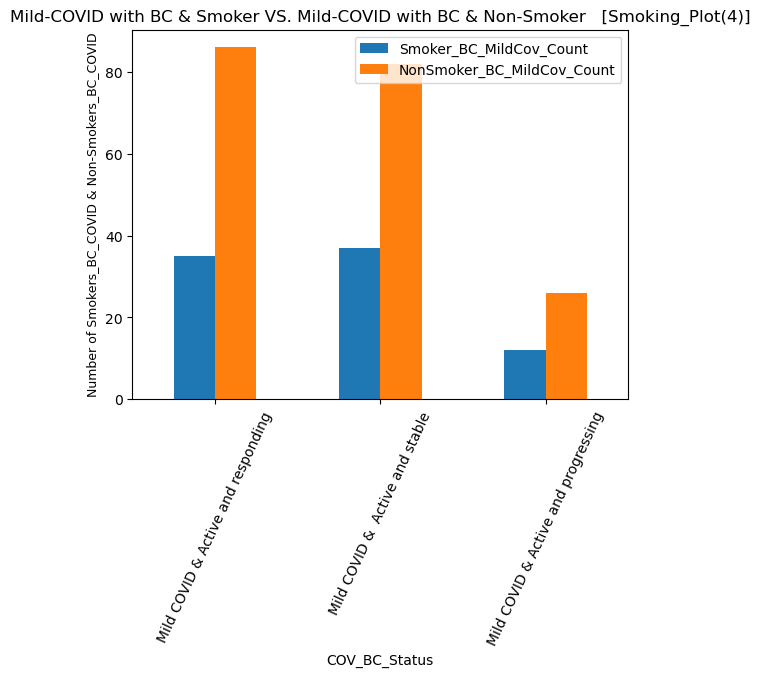

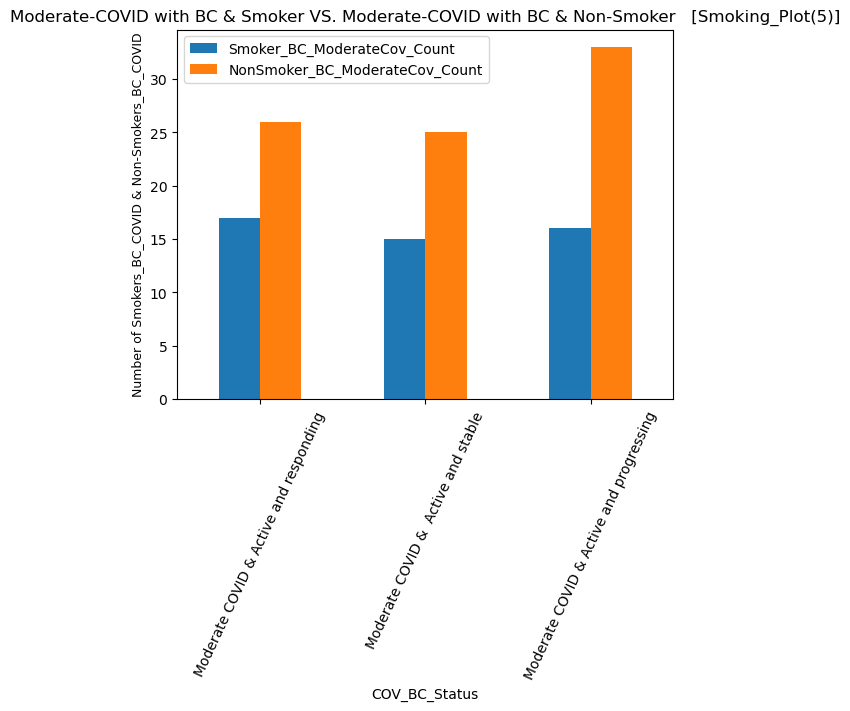

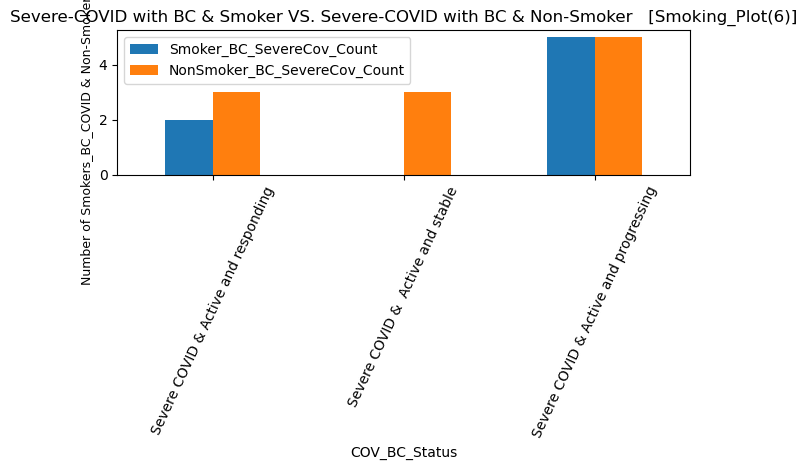

In [152]:
# Plotting

# Mild COVID
COV_BC_Smoker_NonSmoker_plot = MildCov_BC_Smoker_NonSmoker_DF.plot.bar(rot=65)
plt.title("Mild-COVID with BC & Smoker VS. Mild-COVID with BC & Non-Smoker   [Smoking_Plot(4)]")
plt.xlabel("COV_BC_Status")
plt.ylabel("Number of Smokers_BC_COVID & Non-Smokers_BC_COVID", fontsize=9)
# Save the figure
plt.savefig("Smoking_Output_Data/Smoking_Plot(4).png")

# Moderate COVID
COV_BC_Smoker_NonSmoker_plot = ModerateCov_BC_Smoker_NonSmoker_DF.plot.bar(rot=65)
plt.title("Moderate-COVID with BC & Smoker VS. Moderate-COVID with BC & Non-Smoker   [Smoking_Plot(5)]")
plt.xlabel("COV_BC_Status")
plt.ylabel("Number of Smokers_BC_COVID & Non-Smokers_BC_COVID", fontsize=9)
# Save the figure
plt.savefig("Smoking_Output_Data/Smoking_Plot(5).png")

# Severe COVID
COV_BC_Smoker_NonSmoker_plot = SevereCov_BC_Smoker_NonSmoker_DF.plot.bar(rot=65)
plt.title("Severe-COVID with BC & Smoker VS. Severe-COVID with BC & Non-Smoker   [Smoking_Plot(6)]")
plt.xlabel("COV_BC_Status")
plt.ylabel("Number of Smokers_BC_COVID & Non-Smokers_BC_COVID", fontsize=9)
# Save the figure
plt.savefig("Smoking_Output_Data/Smoking_Plot(6).png", bbox_inch)